In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df = pd.read_excel('./data/dt.xlsx')
df.head()

Category                  Title  2024-09-30 00:00:00  \
0  Large Cakes        Buttercup cream                    1   
1  Large Cakes             Lotus Cake                    2   
2  Large Cakes    Salted Caremal Cake                    2   
3  Large Cakes            Coffee Cake                    2   
4  Large Cakes  Lotus three milk cake                    0   

  2024-10-01 00:00:00 2024-10-02 00:00:00  2024-10-03 00:00:00  \
0                   0                   2                    2   
1                   3                   2                    1   
2                   0                   1                    2   
3                   0                   2                    1   
4                   2                   5                    0   

   2024-10-04 00:00:00 2024-10-05 00:00:00  2024-10-06 00:00:00  \
0                    0                   2                    1   
1                    1                   3                    2   
2                    0                   2                    0   
3                    0                   2                    0   
4                    0                   4                    1   

   2024-10-07 00:00:00  ...  2024-10-29 00:00:00  2024-10-30 00:00:00  \
0                    4  ...                    2                    0   
1                    3  ...                    0                    2   
2                    0  ...                    1                    0   
3                    2  ...                    0                    0   
4                    3  ...                    2                    1   

   2024-10-31 00:00:00  2024-11-01 00:00:00  2024-11-02 00:00:00  \
0                    2                    0                    2   
1                    2                    3                    0   
2                    0                    0                    0   
3                    0                    0                    1   
4                    1                    2                    1   

   2024-11-03 00:00:00  2024-11-04 00:00:00  2024-11-05 00:00:00  \
0                    2                    2                    2   
1                    2                    2                    3   
2                    0                    0                    0   
3                    0                    1                    1   
4                    3                    0                    2   

   2024-11-06 00:00:00  2024-11-07 00:00:00  
0                    0                    2  
1                    1                    1  
2                    0                    0  
3                    0                    0  
4                    3                    2  

[5 rows x 38 columns]

In [3]:
melted_data = df.melt(
    id_vars=["Category", "Title"],
    var_name="Date",
    value_name="Sales"
)

melted_data['Date'] = pd.to_datetime(melted_data['Date'])

melted_data.sort_values(by=["Title", "Date"], inplace=True)

In [4]:
df = melted_data.reset_index(drop=True)
df.head()

Category      Title       Date Sales
0    Tarts  Apple pie 2024-09-30     0
1    Tarts  Apple pie 2024-10-01     0
2    Tarts  Apple pie 2024-10-02     2
3    Tarts  Apple pie 2024-10-03     3
4    Tarts  Apple pie 2024-10-04     0

## Category wise analysis

In [5]:
import matplotlib.pyplot as plt

In [6]:
df_cat = df.drop('Title', axis=1)
df_cat.head()


Category       Date Sales
0    Tarts 2024-09-30     0
1    Tarts 2024-10-01     0
2    Tarts 2024-10-02     2
3    Tarts 2024-10-03     3
4    Tarts 2024-10-04     0

In [7]:
df_grams = df.query("Sales == '500g' | Sales == '1kg' | Sales == '2kg'")
df_qnty = df.drop(df_grams.index, axis=0)
df_qnty
# display(dataFrame.query('Salary  <= 100000 & Age < 40 & JOB.str.startswith("C").values'))

Category      Title       Date Sales
0            Tarts  Apple pie 2024-09-30     0
1            Tarts  Apple pie 2024-10-01     0
2            Tarts  Apple pie 2024-10-02     2
3            Tarts  Apple pie 2024-10-03     3
4            Tarts  Apple pie 2024-10-04     0
...            ...        ...        ...   ...
2911  Ordered Cake        NaN 2024-11-03     0
2912  Ordered Cake        NaN 2024-11-04     0
2913  Ordered Cake        NaN 2024-11-05     6
2914  Ordered Cake        NaN 2024-11-06     0
2915  Ordered Cake        NaN 2024-11-07     0

[2906 rows x 4 columns]

In [8]:
df_qnty[df_qnty.Title.isna()].head()

Category Title       Date Sales
2880  Ordered Cake   NaN 2024-09-30     0
2881  Ordered Cake   NaN 2024-10-01     0
2882  Ordered Cake   NaN 2024-10-02     0
2883  Ordered Cake   NaN 2024-10-03     0
2884  Ordered Cake   NaN 2024-10-04     0

In [9]:
df_qnty_cat = df_qnty.drop('Title', axis=1).reset_index(drop=True)
df_qnty_cat.head()

Category       Date Sales
0    Tarts 2024-09-30     0
1    Tarts 2024-10-01     0
2    Tarts 2024-10-02     2
3    Tarts 2024-10-03     3
4    Tarts 2024-10-04     0

In [10]:
df_qnty_cat.Sales = df_qnty_cat.Sales.fillna(0).astype('int32')
df_qnty_cat['Date'] = pd.to_datetime(df_qnty_cat['Date'])
df_qnty_cat.head()

Category       Date  Sales
0    Tarts 2024-09-30      0
1    Tarts 2024-10-01      0
2    Tarts 2024-10-02      2
3    Tarts 2024-10-03      3
4    Tarts 2024-10-04      0

In [11]:
df_qnty_cat = df_qnty_cat.groupby(['Category', 'Date']).sum()
df_qnty_cat = df_qnty_cat.reset_index()

In [38]:
df_qnty_cat

Category       Date  Sales
0    Brownies 2024-09-30     24
1    Brownies 2024-10-01     12
2    Brownies 2024-10-02     34
3    Brownies 2024-10-03      0
4    Brownies 2024-10-04     18
..        ...        ...    ...
499     Tarts 2024-11-03      0
500     Tarts 2024-11-04      0
501     Tarts 2024-11-05      0
502     Tarts 2024-11-06      0
503     Tarts 2024-11-07      0

[504 rows x 3 columns]

## Data Availability (By Date)

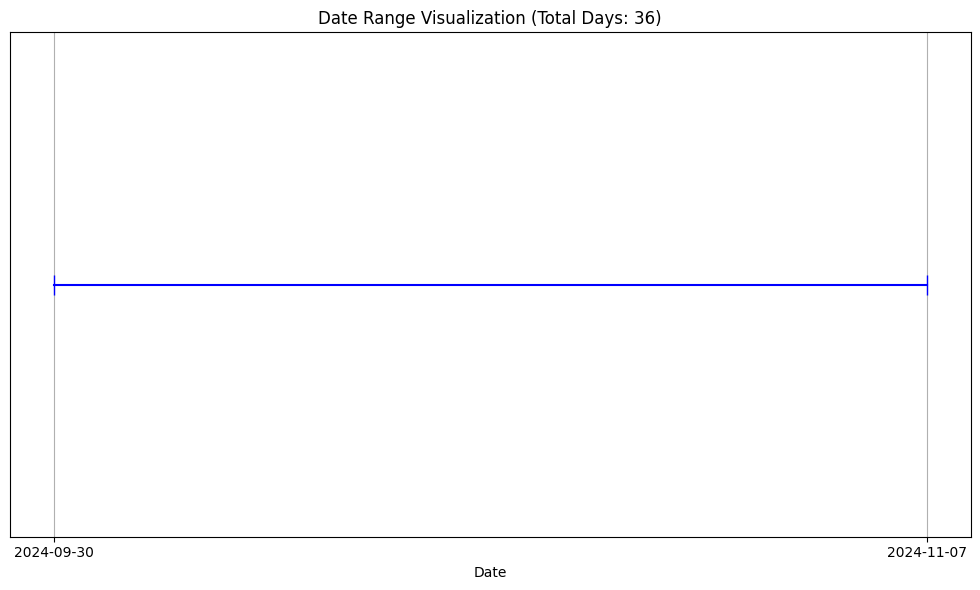

In [12]:
# Plotting the Date range
plt.figure(figsize=(10, 6))
plt.plot([df_qnty_cat['Date'].iloc[0], df_qnty_cat['Date'].iloc[-1]], [0, 0], marker='|', markersize=15, color='b')  # Mark first and last date
# plt.
plt.title(f"Date Range Visualization (Total Days: {len(df_qnty_cat['Date'].unique())})")
plt.xlabel('Date')
plt.ylabel('')  # No y-axis label
plt.yticks([])
plt.xticks([df_qnty_cat['Date'].iloc[0], df_qnty_cat['Date'].iloc[-1]])
plt.grid(axis='x')  # Show grid on x-axis
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()


### Total Categories

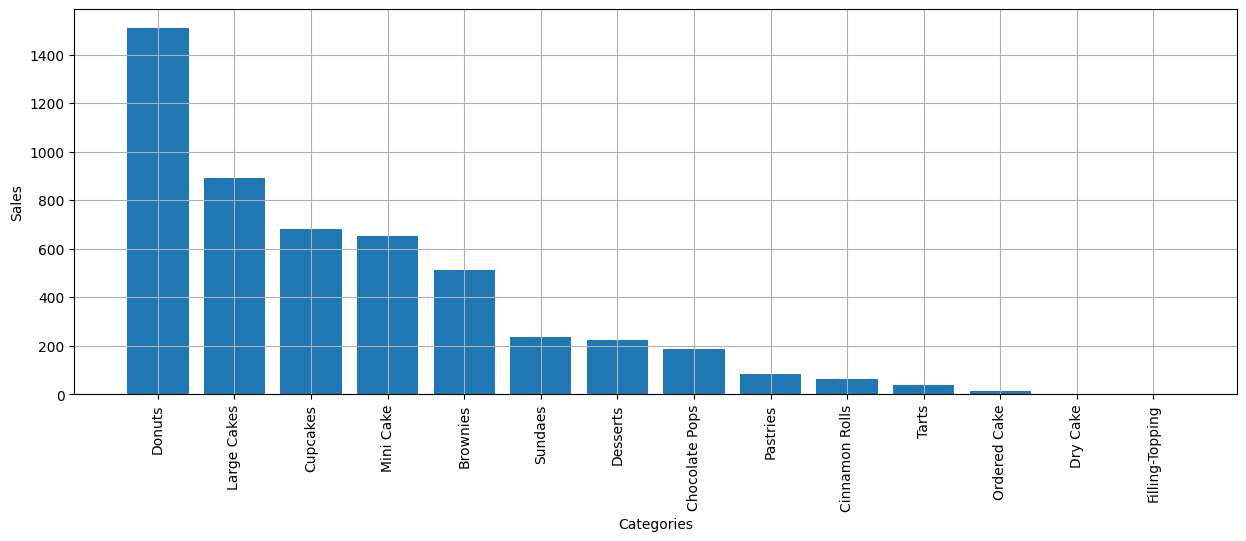

In [13]:
rankings = df_qnty_cat.drop('Date', axis=1).groupby('Category').sum().reset_index().sort_values('Sales', ascending=False)
cats = rankings.Category.unique()
plt.figure(figsize=(15, 5))
plt.xlabel('Categories')
plt.ylabel('Sales')
plt.grid()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.bar(rankings.Category, rankings.Sales)
plt.show()


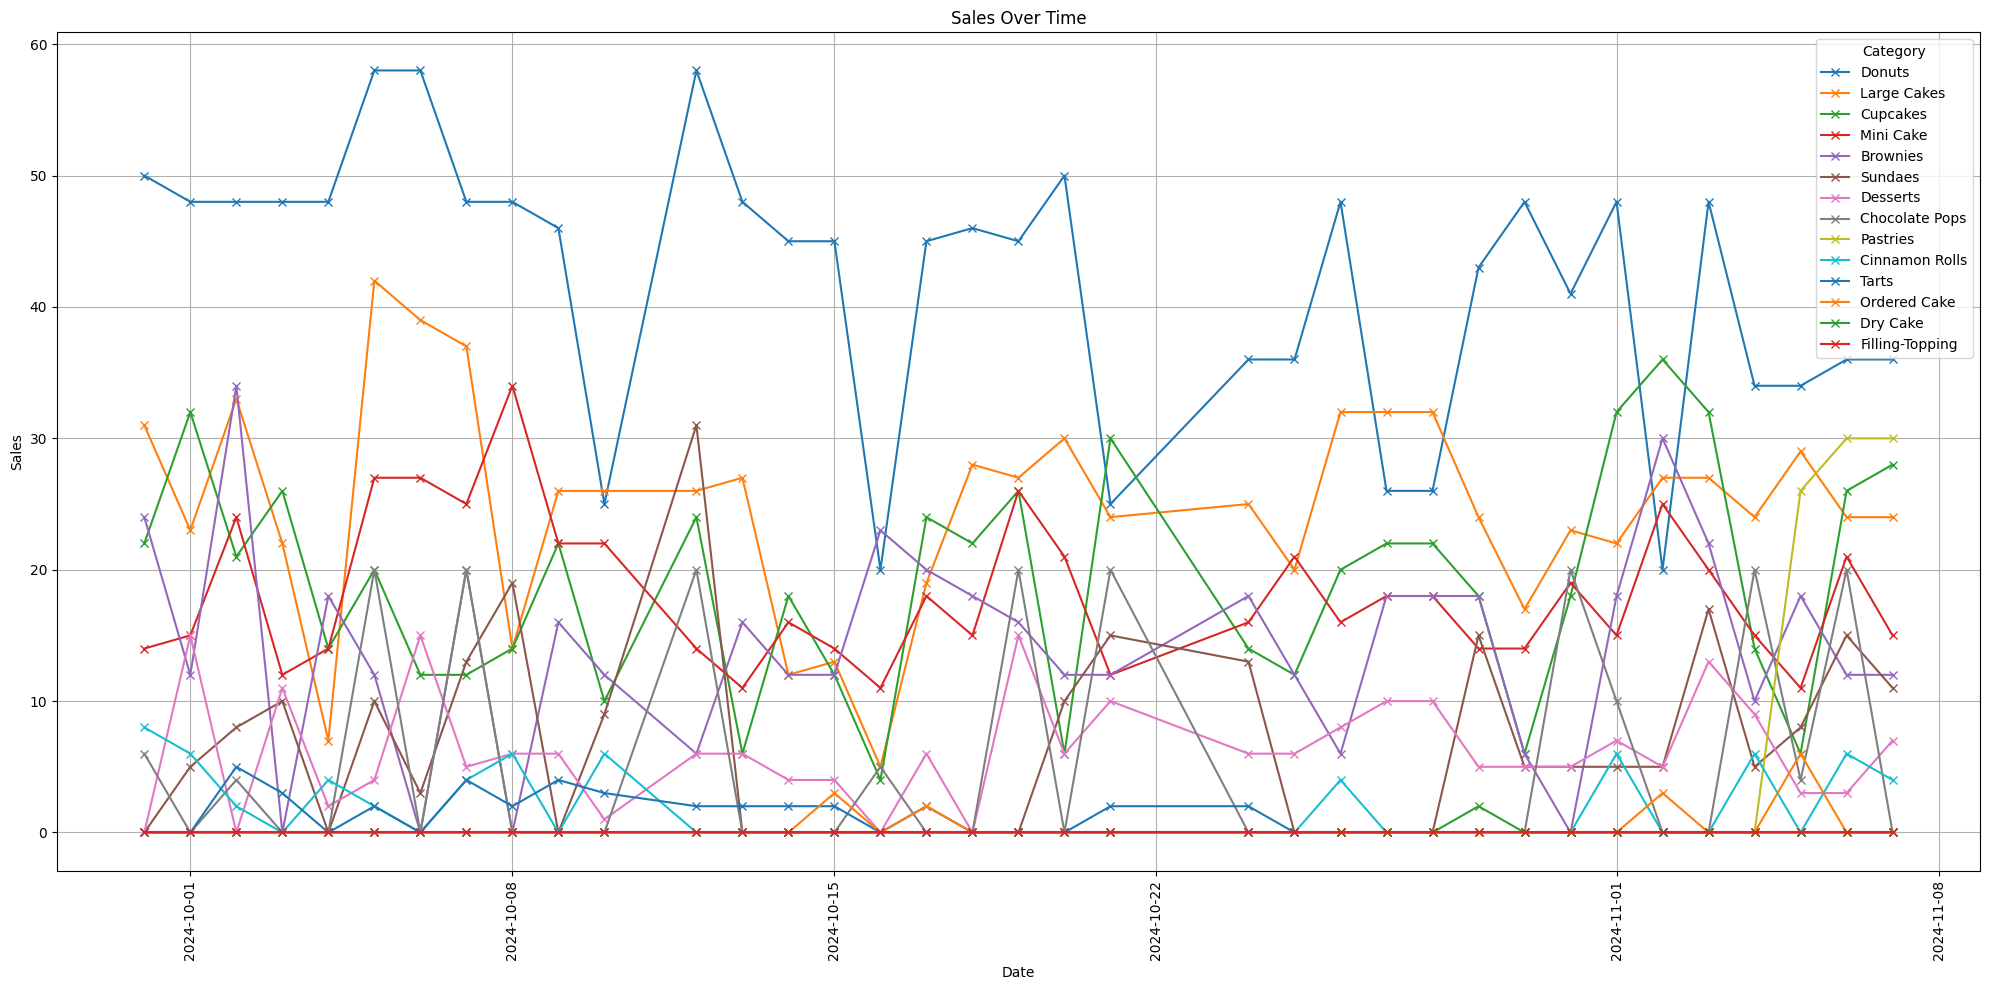

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Sales Over Time')
for cat in cats:
    df_ind = df_qnty_cat[df_qnty_cat.Category == cat]
    df_ind = df_ind.sort_values(by='Date')
    plt.plot(df_ind.Date, df_ind.Sales, marker='x', linestyle='-', label=cat)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.xticks(rotation=90) 

plt.legend(title="Category")
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()


Donuts


<Figure size 200x200 with 0 Axes>

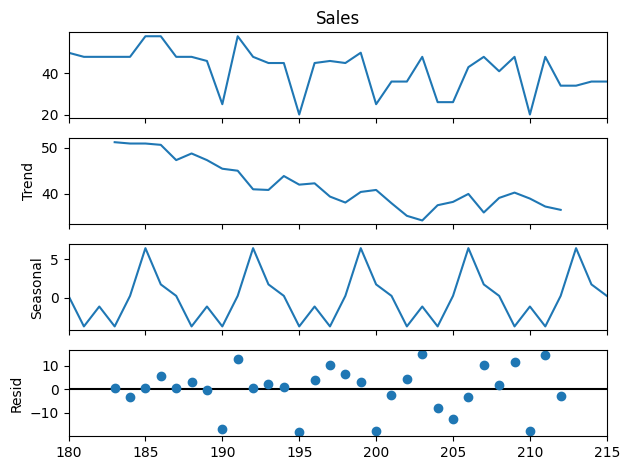

Large Cakes


<Figure size 200x200 with 0 Axes>

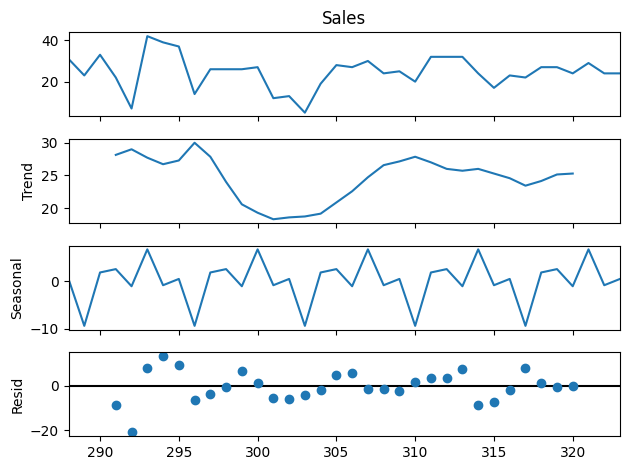

Cupcakes


<Figure size 200x200 with 0 Axes>

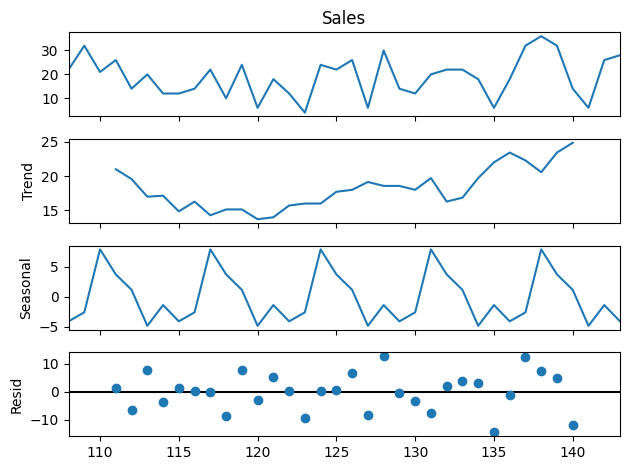

Mini Cake


<Figure size 200x200 with 0 Axes>

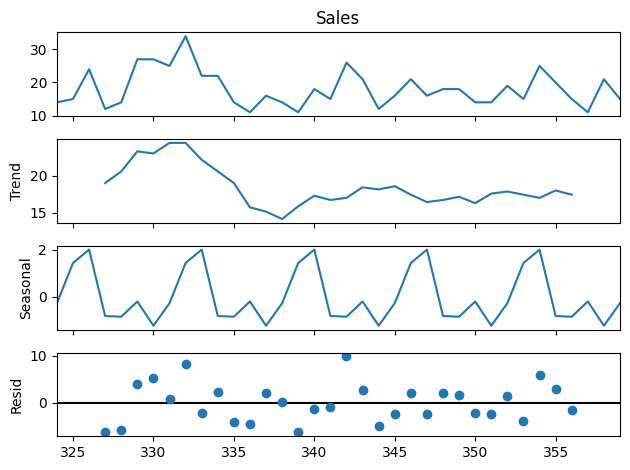

Brownies


<Figure size 200x200 with 0 Axes>

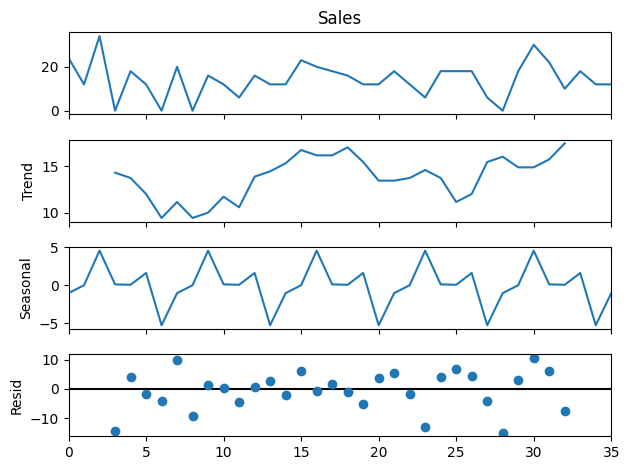

Sundaes


<Figure size 200x200 with 0 Axes>

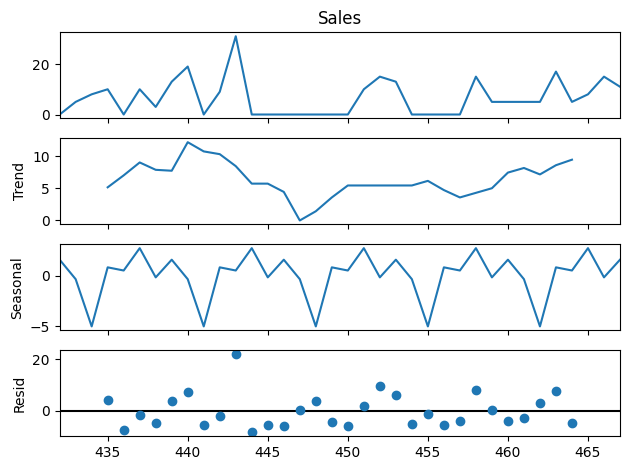

Desserts


<Figure size 200x200 with 0 Axes>

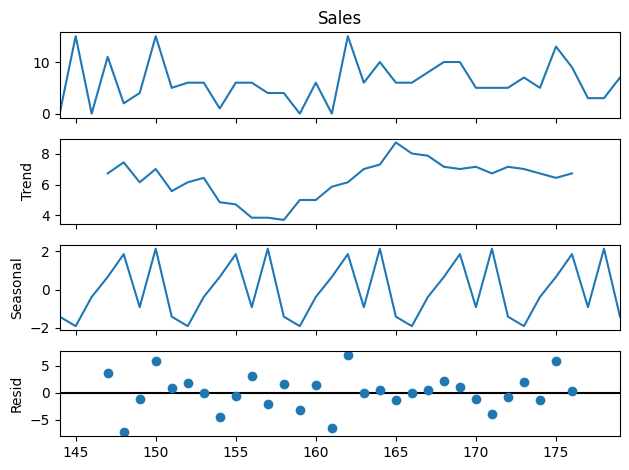

Chocolate Pops


<Figure size 200x200 with 0 Axes>

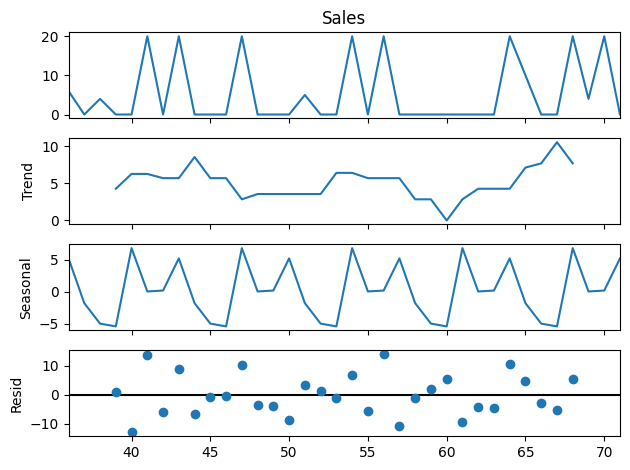

Pastries


<Figure size 200x200 with 0 Axes>

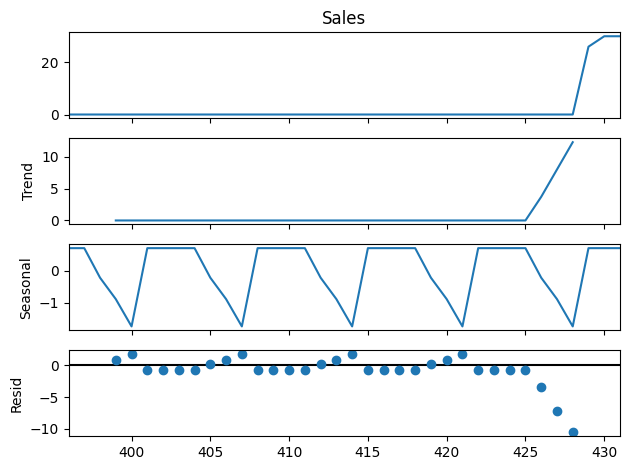

Cinnamon Rolls


<Figure size 200x200 with 0 Axes>

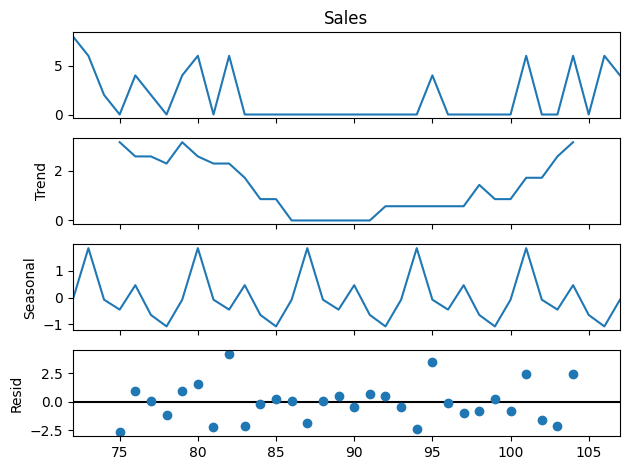

Tarts


<Figure size 200x200 with 0 Axes>

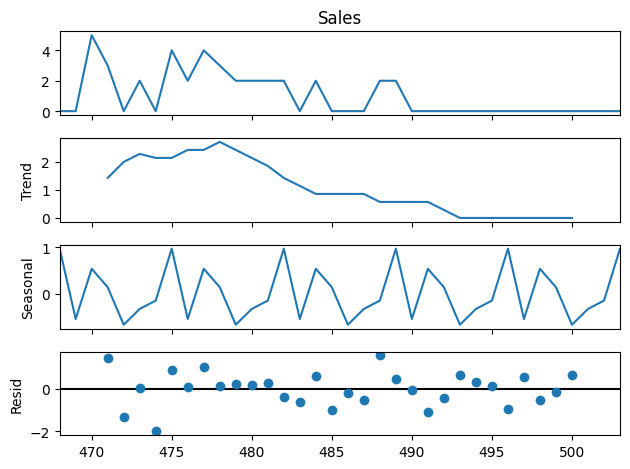

Ordered Cake


<Figure size 200x200 with 0 Axes>

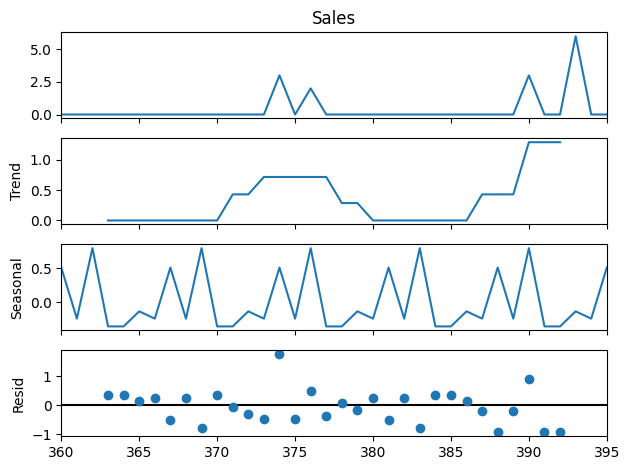

Dry Cake


<Figure size 200x200 with 0 Axes>

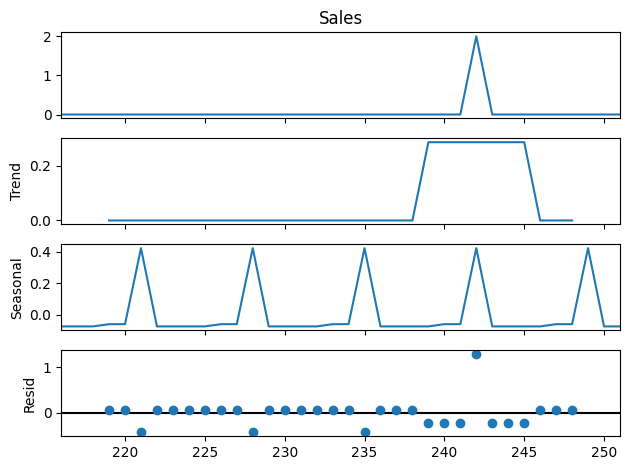

Filling-Topping


<Figure size 200x200 with 0 Axes>

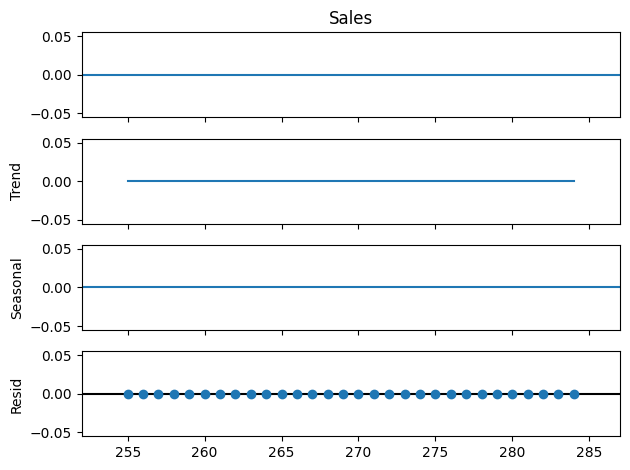

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
for cat in cats:
    decomposition = seasonal_decompose(df_qnty_cat.loc[df_qnty_cat['Category']==cat, :]['Sales'], model='additive', period=7)  # Adjust 'period' as per your data frequency
    # Plot the decomposition
    print(cat)
    plt.figure(figsize=(2, 2))
    decomposition.plot()
    plt.tight_layout()
    plt.show()
# Access the components of the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



In [16]:
df_qnty_cat.head()

Category       Date  Sales
0  Brownies 2024-09-30     24
1  Brownies 2024-10-01     12
2  Brownies 2024-10-02     34
3  Brownies 2024-10-03      0
4  Brownies 2024-10-04     18

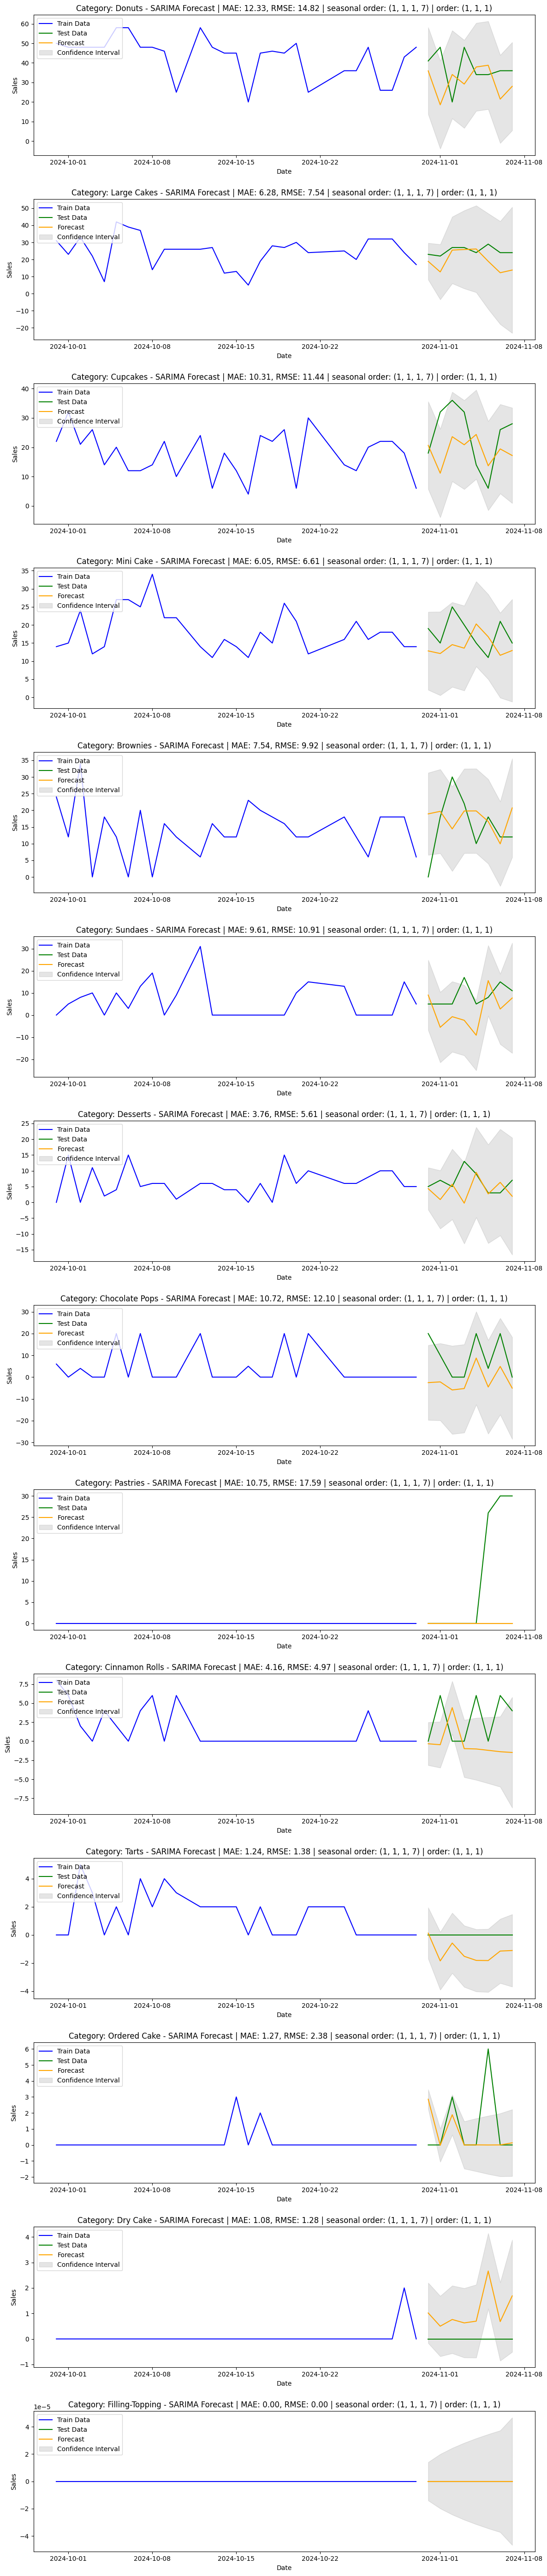

In [28]:
fig, axes = plt.subplots(nrows=len(cats), ncols=1, figsize=(12, len(cats) * 4))
if len(cats) == 1:  # Ensure axes is iterable for a single category
    axes = [axes]

for idx, cat in enumerate(cats):
    data = df_qnty_cat.loc[df_qnty_cat['Category'] == cat, :].reset_index(drop=True).copy()
    data.set_index('Date', inplace=True)
    
    data.sort_index(inplace=True)
    
    train_ratio = 0.8
    train_size = int(len(data) * train_ratio)
    train, test = data.iloc[:train_size], data.iloc[train_size:]
    
    p, d, q = 1, 1, 1
    P, D, Q, s = 1, 1, 1, 7  # Weekly seasonal component
    model = SARIMAX(
        train['Sales'],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        enforce_stationarity=False,
        enforce_invertibility=False,
    )
    sarima_model = model.fit(disp=False)
    
    forecast_steps = len(test)
    forecast = sarima_model.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    mae = mean_absolute_error(test['Sales'], forecast_mean)
    mse = mean_squared_error(test['Sales'], forecast_mean)
    rmse = np.sqrt(mse)
    
    ax = axes[idx]
    ax.plot(train.index, train['Sales'], label='Train Data', color='blue')
    ax.plot(test.index, test['Sales'], label='Test Data', color='green')
    ax.plot(test.index, forecast_mean, label='Forecast', color='orange')
    ax.fill_between(
        test.index,
        forecast_conf_int.iloc[:, 0],
        forecast_conf_int.iloc[:, 1],
        color='gray',
        alpha=0.2,
        label='Confidence Interval'
    )
    ax.set_title(f"Category: {cat} - SARIMA Forecast | MAE: {mae:.2f}, RMSE: {rmse:.2f} | seasonal order: {(P, D, Q, s)} | order: {(p, d, q)}")
    ax.legend(loc='upper left')
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.savefig('./sarima_default_parameter_preds')
plt.show()


### Hyper Parameter tuning for SARIMA

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=173.673, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=169.993, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=173.832, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=175.221, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=165.553, Time=0.14 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=167.539, Time=0.13 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(3,1,1)[7] intercept   : AIC=169.547, Time=0.40 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=163.941, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=168.299, Time=0.07 sec
 ARIMA(0,0,0)(3,1,0)[7] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.12 sec
 ARIMA

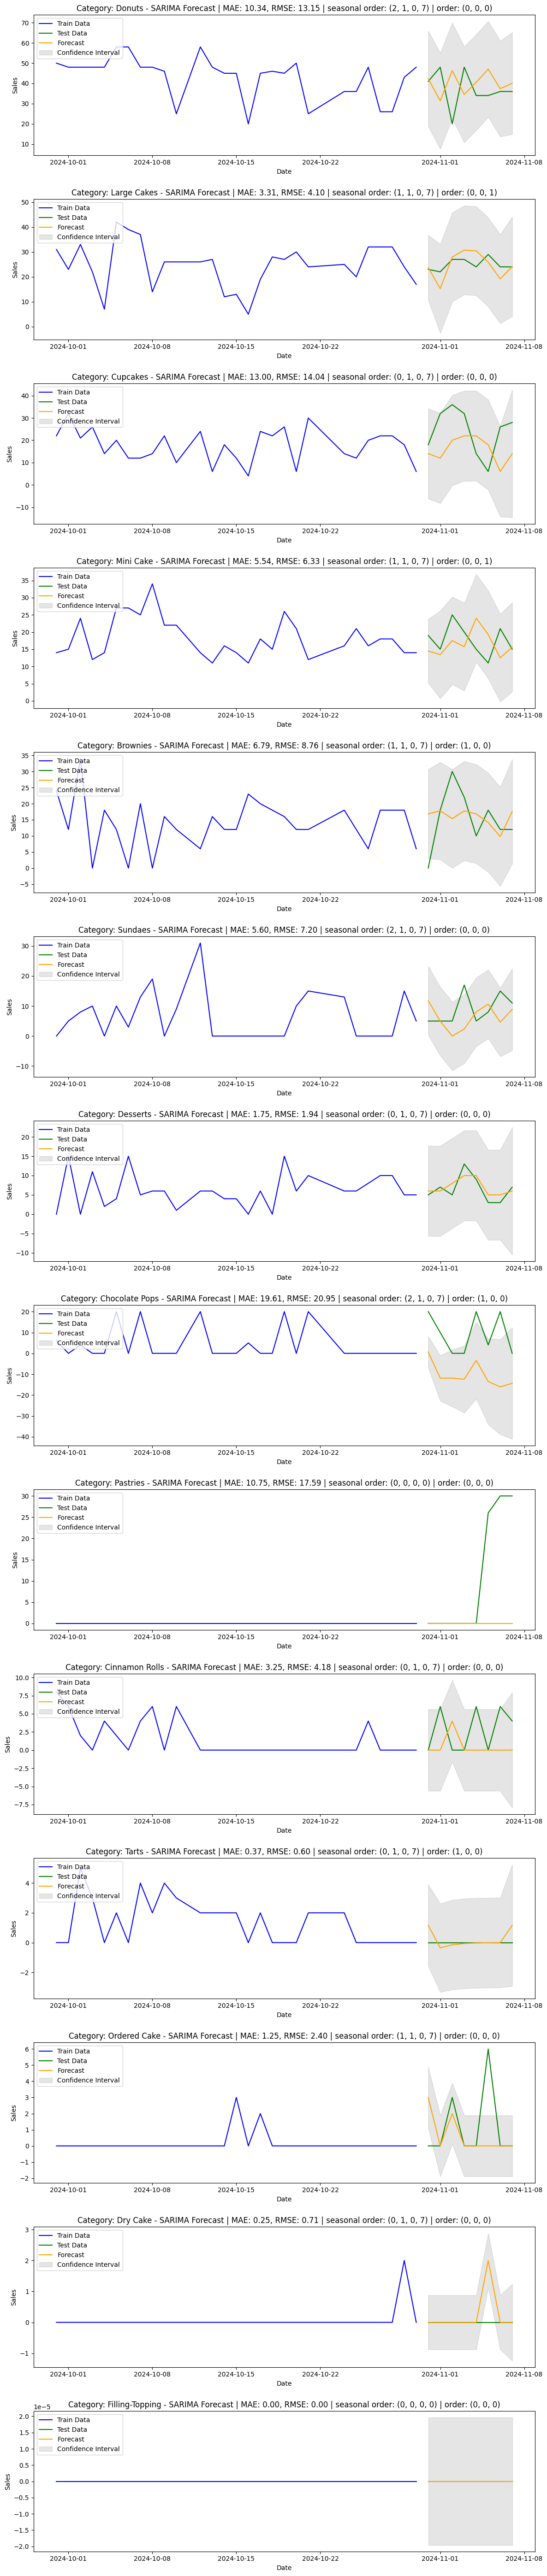

In [36]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

model_dir = "./sarima_models"
os.makedirs(model_dir, exist_ok=True)

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(nrows=len(cats), ncols=1, figsize=(12, len(cats) * 4))
if len(cats) == 1:
    axes = [axes]

for idx, cat in enumerate(cats):
    data = df_qnty_cat.loc[df_qnty_cat['Category'] == cat, :].reset_index(drop=True).copy()
    data.set_index('Date', inplace=True)
    data.sort_index(inplace=True)
    
    train_ratio = 0.8
    train_size = int(len(data) * train_ratio)
    train, test = data.iloc[:train_size], data.iloc[train_size:]
    
    try:
        auto_model = auto_arima(
            train['Sales'],
            seasonal=True,
            m=7,
            start_p=0, max_p=3,
            start_q=0, max_q=3,
            start_P=0, max_P=3,
            start_Q=0, max_Q=3,
            d=None,
            D=1,
            trace=True,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True,
            max_order=10,
        )
        
        (p, d, q) = auto_model.order
        (P, D, Q, s) = auto_model.seasonal_order

    except ValueError as e:
        print(f"Auto ARIMA failed for category {cat}. Error: {e}")
        continue

    model = SARIMAX(
        train['Sales'],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        enforce_stationarity=False,
        enforce_invertibility=False,
    )
    sarima_model = model.fit(disp=False)

    model_path = os.path.join(model_dir, f"sarima_model_{cat}.pkl")
    with open(model_path, 'wb') as f:
        pickle.dump(sarima_model, f)
    print(f"Model saved for category {cat} at {model_path}")
    
    forecast_steps = len(test)
    forecast = sarima_model.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    mae = mean_absolute_error(test['Sales'], forecast_mean)
    mse = mean_squared_error(test['Sales'], forecast_mean)
    rmse = np.sqrt(mse)
    
    ax = axes[idx]
    ax.plot(train.index, train['Sales'], label='Train Data', color='blue')
    ax.plot(test.index, test['Sales'], label='Test Data', color='green')
    ax.plot(test.index, forecast_mean, label='Forecast', color='orange')
    ax.fill_between(
        test.index,
        forecast_conf_int.iloc[:, 0],
        forecast_conf_int.iloc[:, 1],
        color='gray',
        alpha=0.2,
        label='Confidence Interval'
    )
    ax.set_title(f"Category: {cat} - SARIMA Forecast | MAE: {mae:.2f}, RMSE: {rmse:.2f} | seasonal order: {(P, D, Q, s)} | order: {(p, d, q)}")
    ax.legend(loc='upper left')
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.savefig('./sarima_parameter_tuning_preds.jpg')
plt.show()


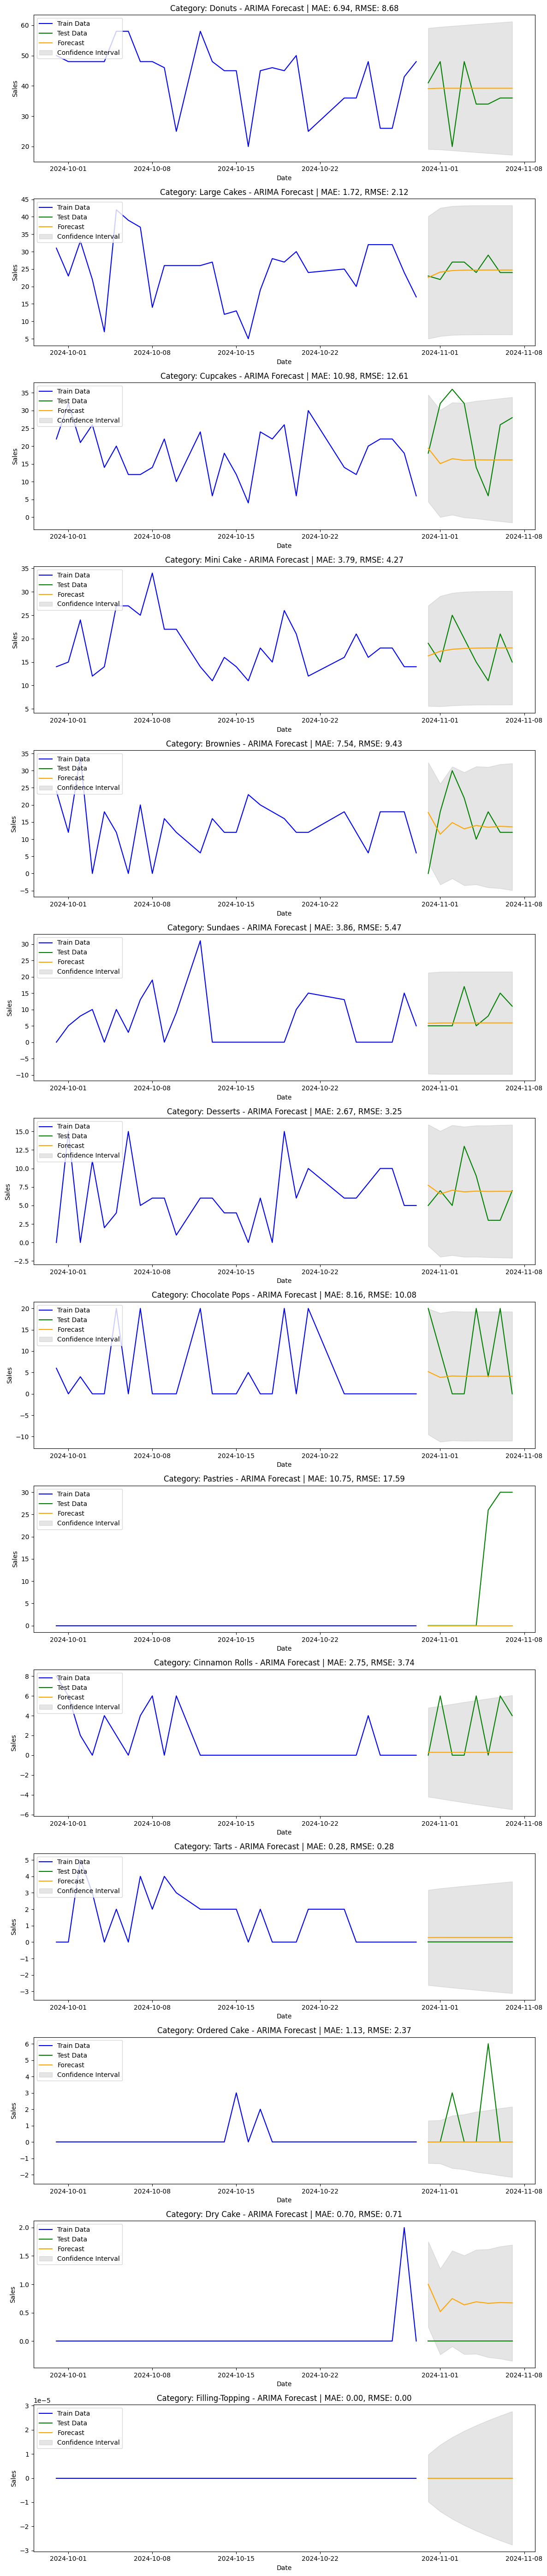

In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize a figure for subplots
fig, axes = plt.subplots(nrows=len(cats), ncols=1, figsize=(12, len(cats) * 4))
if len(cats) == 1:  # Ensure axes is iterable for a single category
    axes = [axes]

# Loop through each category
for idx, cat in enumerate(cats):
    data = df_qnty_cat.loc[df_qnty_cat['Category'] == cat, :].reset_index(drop=True).copy()
    data.set_index('Date', inplace=True)
    
    # Ensure data is sorted by date
    data.sort_index(inplace=True)
    
    # Train-Test Split
    train_ratio = 0.8
    train_size = int(len(data) * train_ratio)
    train, test = data.iloc[:train_size], data.iloc[train_size:]
    
    # Fit ARIMA Model
    p, d, q = 1, 1, 1  # ARIMA parameters
    model = ARIMA(train['Sales'], order=(p, d, q))
    arima_model = model.fit()
    
    # Forecast
    forecast_steps = len(test)
    forecast = arima_model.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    # Evaluation
    mae = mean_absolute_error(test['Sales'], forecast_mean)
    mse = mean_squared_error(test['Sales'], forecast_mean)
    rmse = np.sqrt(mse)
    
    # Plot in subplot
    ax = axes[idx]
    ax.plot(train.index, train['Sales'], label='Train Data', color='blue')
    ax.plot(test.index, test['Sales'], label='Test Data', color='green')
    ax.plot(test.index, forecast_mean, label='Forecast', color='orange')
    ax.fill_between(
        test.index,
        forecast_conf_int.iloc[:, 0],
        forecast_conf_int.iloc[:, 1],
        color='gray',
        alpha=0.2,
        label='Confidence Interval'
    )
    ax.set_title(f"Category: {cat} - ARIMA Forecast | MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    ax.legend(loc='upper left')
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('./arima_preds.jpg')
plt.show()
